In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Specify dataset path and load the data
dataset_path = "dataset_4.csv"
data = pd.read_csv(dataset_path)

In [3]:
# Display dataset information
print("Dataset Overview:")
print(data.info())
print("\nFirst Few Rows of the Dataset:")
print(data.head())
print("\nDataset Summary:")
print(data.describe())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_1   1000 non-null   float64
 1   feature_2   1000 non-null   float64
 2   feature_3   1000 non-null   float64
 3   feature_4   1000 non-null   float64
 4   feature_5   1000 non-null   float64
 5   feature_6   1000 non-null   float64
 6   feature_7   1000 non-null   float64
 7   feature_8   1000 non-null   float64
 8   feature_9   1000 non-null   float64
 9   feature_10  1000 non-null   float64
 10  feature_11  1000 non-null   float64
 11  feature_12  1000 non-null   float64
 12  feature_13  1000 non-null   float64
 13  feature_14  1000 non-null   float64
 14  feature_15  1000 non-null   float64
 15  feature_16  1000 non-null   float64
 16  feature_17  1000 non-null   float64
 17  target      1000 non-null   object 
dtypes: float64(17), object(1)
memory usage: 140.8+ KB
N

In [4]:
# 2. Data Preprocessing
# Separate features X and target y
# Assuming target is the column name for labels
X = data.drop(columns=['target'], errors='ignore')  # Features
y = data['target']  # Target variable

# Encode target labels converting categorical labels into numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Standardize feature values to improve model performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert target labels into one-hot encoded format for multi-class classification
y_categorical = to_categorical(y_encoded)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_categorical, test_size=0.2, random_state=42
)

# Display shapes of training and testing data
print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")

Training Data Shape: (800, 17)
Testing Data Shape: (200, 17)


In [5]:
# 3. Build MLP Model
# Initialize Sequential model
model = Sequential([
    # Input layer and first hidden layer
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),  # Dropout layer to prevent overfitting
    
    # Second hidden layer
    Dense(64, activation='relu'),
    Dropout(0.3),
    
    # Output layer for multi-class classification
    Dense(y_categorical.shape[1], activation='softmax')
])

# Compile model with optimizer, loss function and evaluation metric
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy',  
    metrics=['accuracy']  
)


F:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Display the model summary
print("\nModel Summary:")
model.summary()


Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           2,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,755 (42.01 KB)

 Trainable params: 10,755 (42.01 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# 4. Train Model
# Train model using training data
history = model.fit(
    X_train, y_train,
    epochs=50,  # Number of training iterations
    batch_size=32,  # Number of samples per batch
    validation_split=0.2,  # 20% of training data used for validation
    verbose=1  # Display training progress
)


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3585 - loss: 1.1324 - val_accuracy: 0.6062 - val_loss: 0.8967
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5718 - loss: 0.9031 - val_accuracy: 0.6500 - val_loss: 0.7798
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6619 - loss: 0.7568 - val_accuracy: 0.6812 - val_loss: 0.6974
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7574 - loss: 0.6329 - val_accuracy: 0.7188 - val_loss: 0.6438
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7679 - loss: 0.5985 - val_accuracy: 0.7312 - val_loss: 0.6037
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8054 - loss: 0.5432 - val_accuracy: 0.7500 - val_loss: 0.5708
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7940 - loss: 0.4611 - val_accuracy: 0.7437 - val_loss: 0.5608
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8140 - loss: 0.4648 - val_accuracy: 0.7625 - val_loss:

In [8]:
# 5. Evaluate Model
# Evaluate model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")



Test Loss: 0.3923
Test Accuracy: 0.8650


In [9]:
# 6. Model Predictions
# Generate predictions on test set
y_pred = model.predict(X_test)

# Convert predictions and true labels to class indices
y_pred_classes = np.argmax(y_pred, axis=1)  # Predicted class indices
y_true = np.argmax(y_test, axis=1)  # True class indices

# Classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=label_encoder.classes_))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

Classification Report:
              precision    recall  f1-score   support

       paper       0.86      0.96      0.91       102
        rock       0.90      0.80      0.85        70
    scissors       0.79      0.68      0.73        28

    accuracy                           0.86       200
   macro avg       0.85      0.81      0.83       200
weighted avg       0.87      0.86      0.86       200



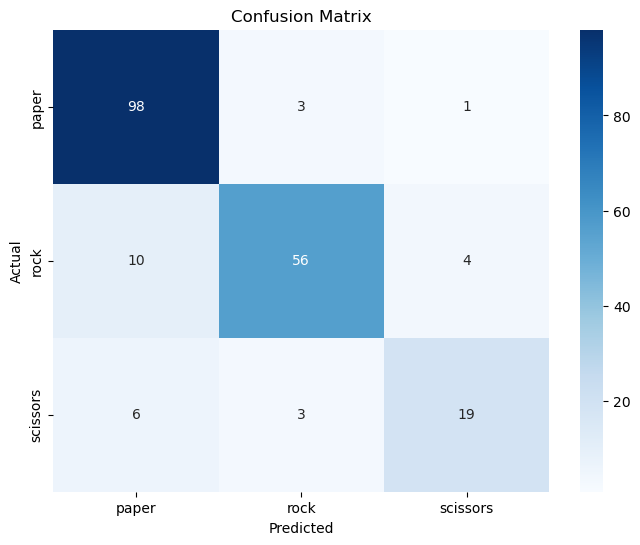

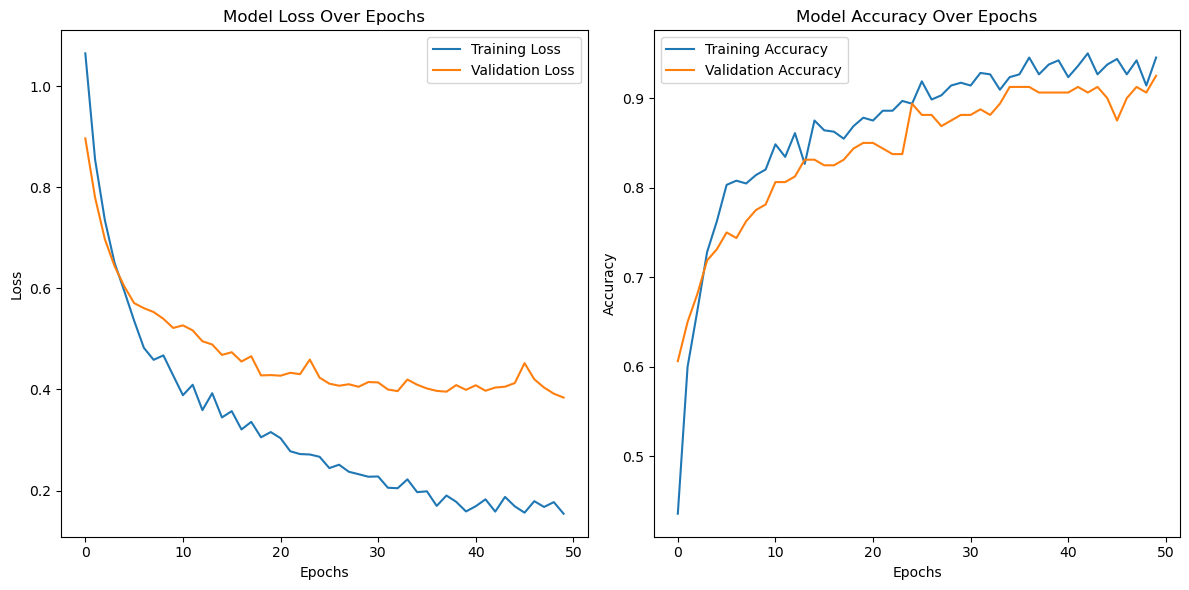

In [10]:
# 7. Visualize Results
# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_
)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Training Performance Visualization
plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()